### Data exploration of Law School Admissions Bar Passage Dataset

##### dataset source: https://www.kaggle.com/datasets/danofer/law-school-admissions-bar-passage/data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print('libraries imported')

libraries imported


In [2]:
#load the dataset
dataset_path = 'C:/Users/20181588/Desktop/AA SDG/synthetic-data-generation/Law School Admissions Bar Passage/Dataset/bar_pass_prediction.csv'
original_data = pd.read_csv(dataset_path)

# Make a copy of the dataset to make sure original data untouched 
data_full = original_data.copy()

There are many features but we will keep only the following in the upcoming exploration:

ugpa - This one stands for undergraduate gpa. Every other feature with gpa in it either perfectly correlates or perfectly negatively correlates with ugpa and this is the one I decided to keep.

decile1, decile1b, decile3 - These features represent the law school rankings by decile of each candidate in years 1 and 3 (and I’m assuming year one second semester, but I can’t be sure about that).

lsat - This feature is obviously the LSAT score of each candidate, but oddly it’s not formatted in the 120 to 180 score range of the actual LSAT. That said it has a strong correlation to whether someone passed the bar and, well, the feature is called lsat!

grad - This seems to be whether the student who took the bar exam graduated from law school. It’s a binary variable and there are very few 0s, so that makes the most sense. (Special kudos to the 65 students surveyed who didn’t graduate law school, but still managed to pass the bar!)

fulltime - Was the student a full-time student.

fam_inc - This feature is family income by quintile.

tier - What tier law school did the student attend by quintile.

race1 - Categorizes students by race. Of all the race variables this was the most complete, so it’s the one I kept. All the information contained in the other race variables are contained in race1.

sex - student gender.

pass_bar - This is the target variable. Did the student pass the bar.

##### Dataset Preparation

In [3]:
# Check all columns available
data_full.columns

Index(['decile1b', 'decile3', 'ID', 'decile1', 'sex', 'race', 'cluster',
       'lsat', 'ugpa', 'zfygpa', 'DOB_yr', 'grad', 'zgpa', 'bar1', 'bar1_yr',
       'bar2', 'bar2_yr', 'fulltime', 'fam_inc', 'age', 'gender', 'parttime',
       'male', 'race1', 'race2', 'Dropout', 'other', 'asian', 'black', 'hisp',
       'pass_bar', 'bar', 'bar_passed', 'tier', 'index6040', 'indxgrp',
       'indxgrp2', 'dnn_bar_pass_prediction', 'gpa'],
      dtype='object')

In [4]:
# List of columns to keep
columns_to_keep = [
    'pass_bar',  'ugpa', 'decile1', 'decile1b',
    'decile3', 'lsat', 'grad', 'fulltime', 'fam_inc',
    'tier', 'race1', 'gender'
]



df = data_full[columns_to_keep]

In [5]:
# Convert 'grad' to binary where 'Y' is 1 and anything else is 0
df['grad'] = df['grad'].apply(lambda x: 1 if x == 'Y' else 0)

C:\Users\20181588\AppData\Local\Temp\ipykernel_20824\1767879627.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['grad'] = df['grad'].apply(lambda x: 1 if x == 'Y' else 0)


In [6]:
# Check the shape and names of the columns left
print(df.shape)
print(df.columns)


(22407, 12)
Index(['pass_bar', 'ugpa', 'decile1', 'decile1b', 'decile3', 'lsat', 'grad',
       'fulltime', 'fam_inc', 'tier', 'race1', 'gender'],
      dtype='object')


In [7]:
# Check how many rows with missing values are there
print(df.isnull().sum())


pass_bar       0
ugpa           0
decile1     1092
decile1b    1604
decile3     1604
lsat           0
grad           0
fulltime      34
fam_inc      289
tier          96
race1         16
gender         5
dtype: int64


In [8]:
# Inspect the dataframe
display(df.head())

,pass_bar,ugpa,decile1,decile1b,decile3,lsat,grad,fulltime,fam_inc,tier,race1,gender
0,1,3.5,10.0,10.0,10.0,44.0,1,1.0,5.0,4.0,white,female
1,1,3.5,5.0,5.0,4.0,29.0,1,1.0,4.0,2.0,white,female
2,1,3.5,3.0,3.0,2.0,36.0,1,1.0,1.0,3.0,white,male
3,1,3.5,7.0,7.0,4.0,39.0,1,1.0,4.0,3.0,white,male
4,1,3.5,9.0,9.0,8.0,48.0,1,1.0,4.0,5.0,white,male


In [9]:
# Remove all rows with missing values
initial_row_count = df.shape[0]
df = df.dropna()
removed_rows = initial_row_count - df.shape[0]
print(f"Removed {removed_rows} rows with missing values.")

Removed 1895 rows with missing values.


In [10]:
# Check if all the rows with missing values are removed
print(df.shape)
print(df.columns)
print(df.isnull().sum())


(20512, 12)
Index(['pass_bar', 'ugpa', 'decile1', 'decile1b', 'decile3', 'lsat', 'grad',
       'fulltime', 'fam_inc', 'tier', 'race1', 'gender'],
      dtype='object')
pass_bar    0
ugpa        0
decile1     0
decile1b    0
decile3     0
lsat        0
grad        0
fulltime    0
fam_inc     0
tier        0
race1       0
gender      0
dtype: int64


In [11]:
# Inspect the dataframe
display(df.head())

,pass_bar,ugpa,decile1,decile1b,decile3,lsat,grad,fulltime,fam_inc,tier,race1,gender
0,1,3.5,10.0,10.0,10.0,44.0,1,1.0,5.0,4.0,white,female
1,1,3.5,5.0,5.0,4.0,29.0,1,1.0,4.0,2.0,white,female
2,1,3.5,3.0,3.0,2.0,36.0,1,1.0,1.0,3.0,white,male
3,1,3.5,7.0,7.0,4.0,39.0,1,1.0,4.0,3.0,white,male
4,1,3.5,9.0,9.0,8.0,48.0,1,1.0,4.0,5.0,white,male


In [12]:
# Inspect the dataframe
display(df.head())

,pass_bar,ugpa,decile1,decile1b,decile3,lsat,grad,fulltime,fam_inc,tier,race1,gender
0,1,3.5,10.0,10.0,10.0,44.0,1,1.0,5.0,4.0,white,female
1,1,3.5,5.0,5.0,4.0,29.0,1,1.0,4.0,2.0,white,female
2,1,3.5,3.0,3.0,2.0,36.0,1,1.0,1.0,3.0,white,male
3,1,3.5,7.0,7.0,4.0,39.0,1,1.0,4.0,3.0,white,male
4,1,3.5,9.0,9.0,8.0,48.0,1,1.0,4.0,5.0,white,male


In [13]:
# Check types of columns
print(df.dtypes)

pass_bar      int64
ugpa        float64
decile1     float64
decile1b    float64
decile3     float64
lsat        float64
grad          int64
fulltime    float64
fam_inc     float64
tier        float64
race1        object
gender       object
dtype: object


In [14]:
# Which colums are categorical
categorical_columns = df.select_dtypes(include=['object'])
print(categorical_columns.columns)

Index(['race1', 'gender'], dtype='object')


##### Basic Dataset Exploration

In [15]:
# Basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20512 entries, 0 to 22406
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pass_bar  20512 non-null  int64  
 1   ugpa      20512 non-null  float64
 2   decile1   20512 non-null  float64
 3   decile1b  20512 non-null  float64
 4   decile3   20512 non-null  float64
 5   lsat      20512 non-null  float64
 6   grad      20512 non-null  int64  
 7   fulltime  20512 non-null  float64
 8   fam_inc   20512 non-null  float64
 9   tier      20512 non-null  float64
 10  race1     20512 non-null  object 
 11  gender    20512 non-null  object 
dtypes: float64(8), int64(2), object(2)
memory usage: 2.0+ MB


In [16]:
# Statistical summary of the numerical features
df.describe()

,pass_bar,ugpa,decile1,decile1b,decile3,lsat,grad,fulltime,fam_inc,tier
count,20512.000000,20512.000000,20512.000000,20512.000000,20512.000000,20512.000000,20512.0,20512.000000,20512.000000,20512.000000
mean,0.949152,3.212754,5.715776,5.530519,5.527691,36.707849,1.0,1.073274,3.469238,3.715142
std,0.219693,0.401409,2.777190,2.854259,2.851588,5.382639,0.0,0.260592,0.853646,1.126328
min,0.000000,1.500000,1.000000,1.000000,1.000000,11.000000,1.0,1.000000,1.000000,1.000000
25%,1.000000,3.000000,3.000000,3.000000,3.000000,33.000000,1.0,1.000000,3.000000,3.000000
50%,1.000000,3.200000,6.000000,6.000000,6.000000,37.000000,1.0,1.000000,4.000000,4.000000
75%,1.000000,3.500000,8.000000,8.000000,8.000000,40.000000,1.0,1.000000,4.000000,4.000000
max,1.000000,3.900000,10.000000,10.000000,10.000000,48.000000,1.0,2.000000,5.000000,6.000000


##### Data Distributions

In [17]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

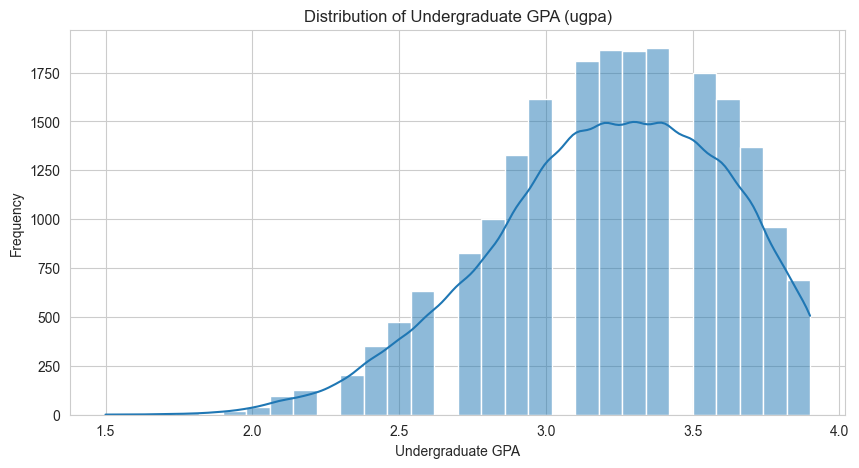

In [18]:
plt.figure(figsize=(10, 5))
sns.histplot(df['ugpa'], kde=True, bins=30)
plt.title('Distribution of Undergraduate GPA (ugpa)')
plt.xlabel('Undergraduate GPA')
plt.ylabel('Frequency')
plt.show()

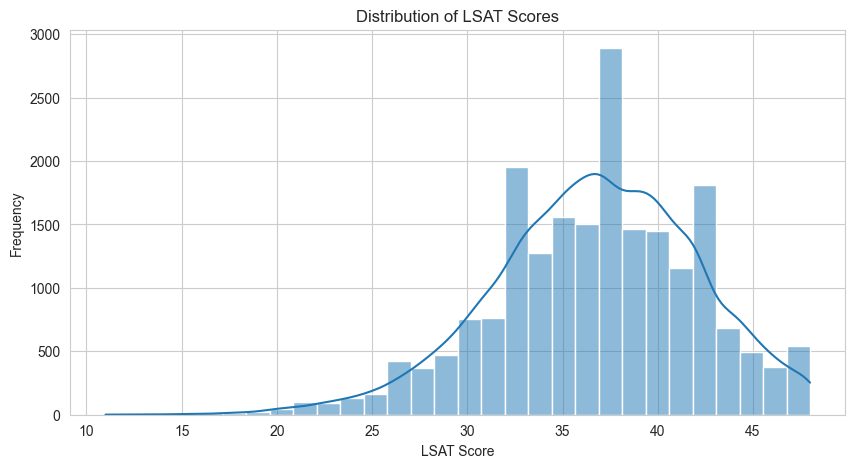

In [19]:
plt.figure(figsize=(10, 5))
sns.histplot(df['lsat'], kde=True, bins=30)
plt.title('Distribution of LSAT Scores')
plt.xlabel('LSAT Score')
plt.ylabel('Frequency')
plt.show()

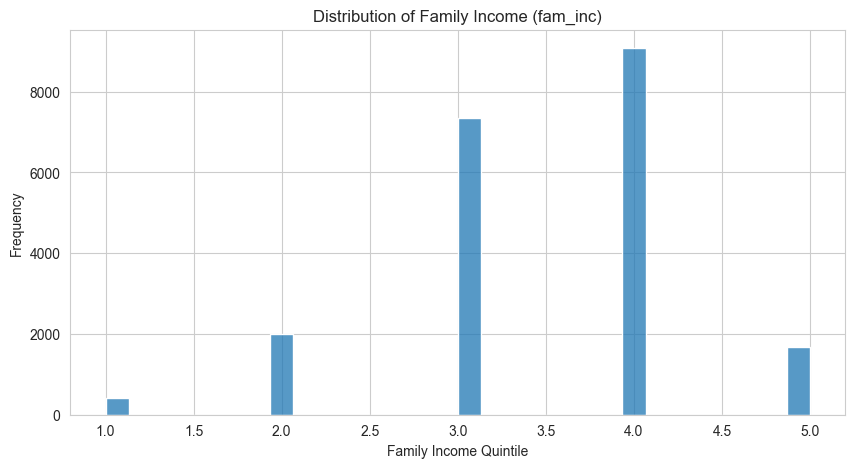

In [20]:
plt.figure(figsize=(10, 5))
sns.histplot(df['fam_inc'], kde=False, bins=30)
plt.title('Distribution of Family Income (fam_inc)')
plt.xlabel('Family Income Quintile')
plt.ylabel('Frequency')
plt.show()

###### First Quintile (1.0): This is the lowest income group and represents the bottom 20% of the population in terms of income.

###### Second Quintile (2.0): This group is above the lowest 20% but below the median, representing families with income greater than 20% of the population but less than 40%.

###### Third Quintile (3.0): This is the middle income group, indicating families with income greater than 40% but less than 60% of the population, essentially the middle class.

###### Fourth Quintile (4.0): This quintile represents families with income greater than 60% but less than 80% of the population, typically upper-middle-class families.

###### Fifth Quintile (5.0): This is the highest income group, representing the top 20% of the population in terms of income.

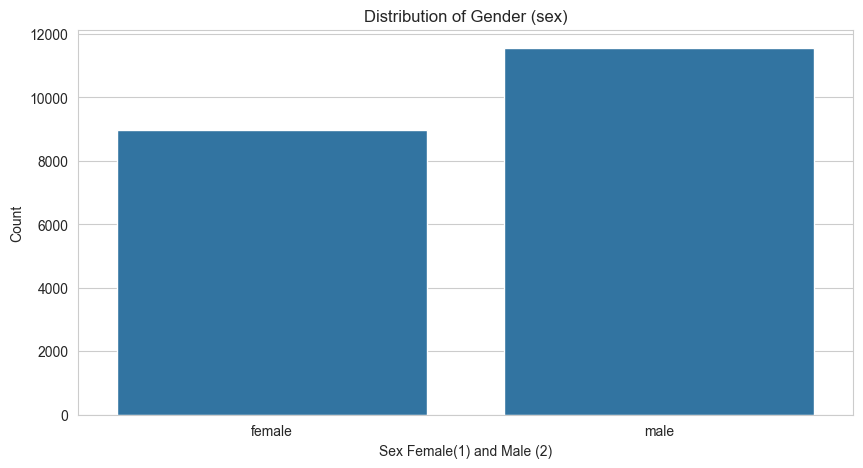

In [21]:
plt.figure(figsize=(10, 5))
sns.countplot(x='gender', data=df)
plt.title('Distribution of Gender (sex)')
plt.xlabel('Sex Female(1) and Male (2)')
plt.ylabel('Count')
plt.show()


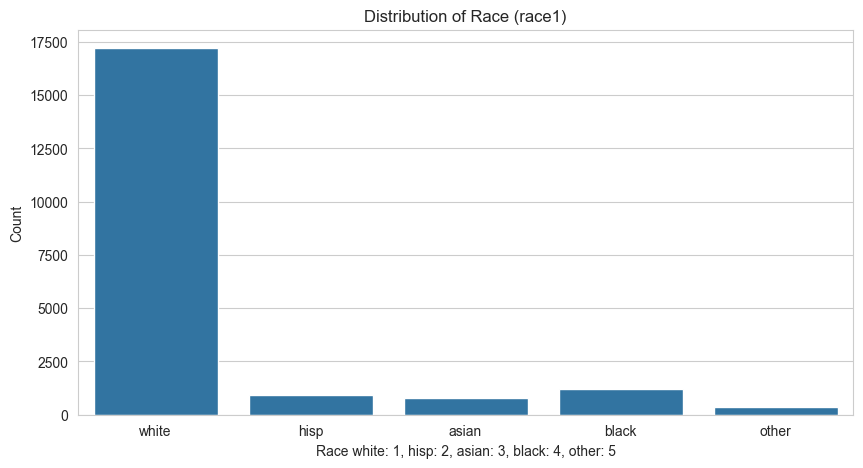

In [22]:
plt.figure(figsize=(10, 5))
sns.countplot(x='race1', data=df)
plt.title('Distribution of Race (race1)')
plt.xlabel('Race white: 1, hisp: 2, asian: 3, black: 4, other: 5')
plt.ylabel('Count')
plt.show()

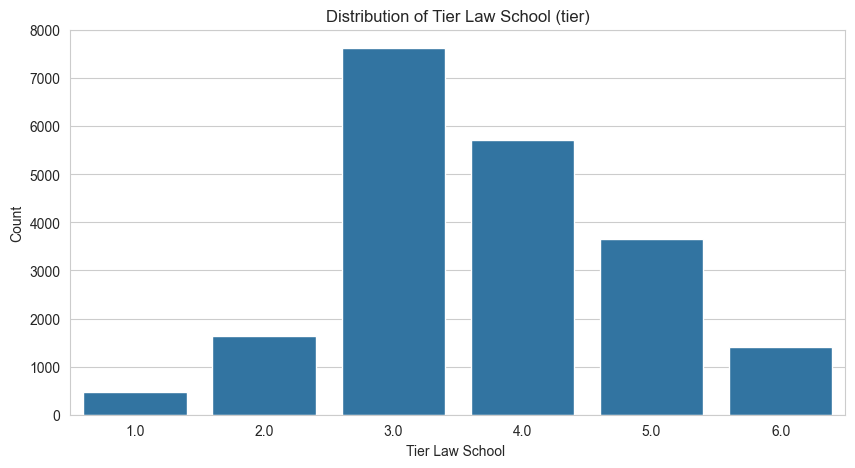

In [23]:
plt.figure(figsize=(10, 5))
sns.countplot(x='tier', data=df)
plt.title('Distribution of Tier Law School (tier)')
plt.xlabel('Tier Law School ')
plt.ylabel('Count')
plt.show()

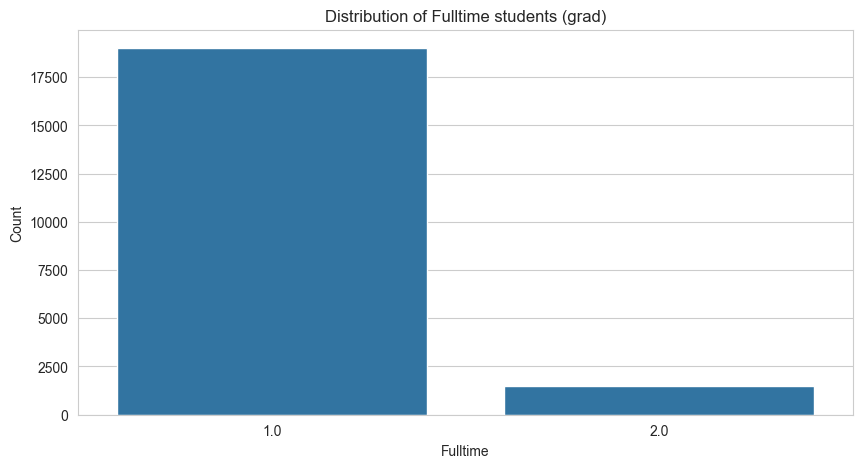

In [24]:
plt.figure(figsize=(10, 5))
sns.countplot(x='fulltime', data=df)
plt.title('Distribution of Fulltime students (grad)')
plt.xlabel('Fulltime')
plt.ylabel('Count')
plt.show()

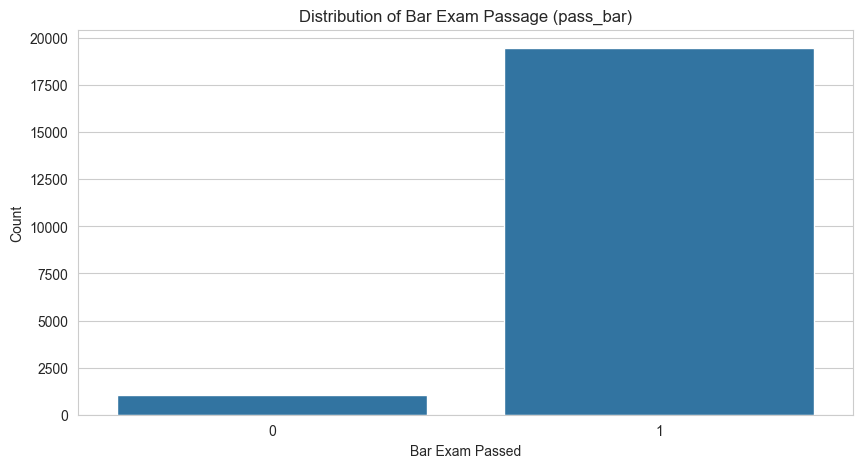

In [25]:
plt.figure(figsize=(10, 5))
sns.countplot(x='pass_bar', data=df)
plt.title('Distribution of Bar Exam Passage (pass_bar)')
plt.xlabel('Bar Exam Passed')
plt.ylabel('Count')
plt.show()

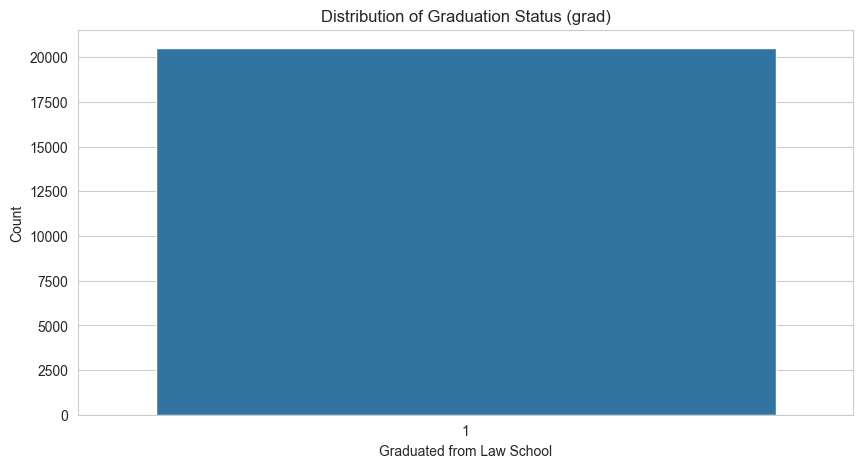

In [26]:
plt.figure(figsize=(10, 5))
sns.countplot(x='grad', data=df)
plt.title('Distribution of Graduation Status (grad)')
plt.xlabel('Graduated from Law School')
plt.ylabel('Count')
plt.show()

Data Exploration Correlations